# Ford GoBike 2019
## by (Anthony Isaiah)

## Introduction
> Ford GoBike System Dataset includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area in the month of February, 2019.This system was established in the year 2013. As of 2018 they had about 2600 bicycles in 262 sations across San Francisco, East Bay and San Jose.

> The bicycles are in two categories; the classic dock model and the hybrid model that can be parked at a dock or used in a dockless manner. They are usually available 24 Hrs a day, 365 days a year. Customers may choose either a single ride or an annual membership. Single rides start at around 3 dollars per single trip and a day may cost up to 10 dollars. Memberships cost 25 dollars per month or 159 dollars per year.

> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area in the year 2019. The data set has been stored as a csv file, it has 16 features and 183412 entries.




## Preliminary Wrangling

> .The data aims to explore the Ford Gobike trip data of February 2019

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# Loading the dataset


In [2]:
# Loading the dataset and Viewing it
df_data = pd.read_csv('201902-fordgobike-tripdata.csv')
df_data.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


#  Assessing the data

In [3]:
#viewing a sample of 30
df_data.sample(30)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
31099,1081,2019-02-24 17:24:59.0350,2019-02-24 17:43:00.8310,96.0,Dolores St at 15th St,37.766210,-122.426614,72.0,Page St at Scott St,37.772406,-122.435650,5525,Subscriber,1964.0,Male,No
40705,611,2019-02-22 19:49:49.4250,2019-02-22 20:00:01.0260,109.0,17th St at Valencia St,37.763316,-122.421904,61.0,Howard St at 8th St,37.776513,-122.411306,5851,Subscriber,1991.0,Male,No
88052,381,2019-02-16 20:25:28.1000,2019-02-16 20:31:49.3190,285.0,Webster St at O'Farrell St,37.783521,-122.431158,73.0,Pierce St at Haight St,37.771793,-122.433708,5318,Subscriber,1991.0,Female,No
163544,465,2019-02-05 09:12:35.9300,2019-02-05 09:20:21.1030,27.0,Beale St at Harrison St,37.788059,-122.391865,81.0,Berry St at 4th St,37.775880,-122.393170,1985,Subscriber,1985.0,Male,No
49874,646,2019-02-21 20:11:59.7450,2019-02-21 20:22:46.1940,252.0,Channing Way at Shattuck Ave,37.865847,-122.267443,273.0,Fulton St at Ashby Ave,37.855574,-122.263565,5639,Subscriber,1995.0,Male,No
89730,2372,2019-02-16 14:15:56.9750,2019-02-16 14:55:29.5300,33.0,Golden Gate Ave at Hyde St,37.781650,-122.415408,99.0,Folsom St at 15th St,37.767037,-122.415443,6254,Subscriber,1989.0,Male,No
122305,878,2019-02-11 12:10:16.6140,2019-02-11 12:24:54.9720,13.0,Commercial St at Montgomery St,37.794231,-122.402923,36.0,Folsom St at 3rd St,37.783830,-122.398870,4748,Subscriber,1974.0,Female,No
21913,613,2019-02-26 08:41:52.8730,2019-02-26 08:52:06.2110,39.0,Scott St at Golden Gate Ave,37.778999,-122.436861,44.0,Civic Center/UN Plaza BART Station (Market St ...,37.781074,-122.411738,6356,Subscriber,1994.0,Male,No
47265,385,2019-02-22 08:56:55.1970,2019-02-22 09:03:20.9110,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,102.0,Irwin St at 8th St,37.766883,-122.399579,6254,Subscriber,1971.0,Male,No
54432,353,2019-02-21 12:54:18.7870,2019-02-21 13:00:11.7980,89.0,Division St at Potrero Ave,37.769218,-122.407646,99.0,Folsom St at 15th St,37.767037,-122.415443,6091,Subscriber,1992.0,Male,No


In [4]:
# checking the info of the data
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


In [5]:
# look at its shape
df_data.shape

(183412, 16)

In [6]:
# get some descriptives
df_data.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [7]:
# cheking if there are duplicates
df_data.duplicated().sum()

0

# Quality Issues includes the following:

In [8]:
# create a copy of the dataset
df_data_clean = df_data.copy()

# Cleaning the data

# Define

# 1. Changing the datatype of the following Features
    1.Changing the following features to Object 
       i.bike_id
       ii.start_station_id
       iii.end_station_id.
    2.Changing the following features to timestamp format
       i.start_time
       ii.end_time.
    3.Changing the following features to Category format
       i.user_type
       ii.gender
       iii.bike_share_for_all_trip 

# Code

In [9]:
# changing the format to datetime format
df_data_clean.start_time = pd.to_datetime(df_data_clean.start_time) 
df_data_clean.end_time = pd.to_datetime(df_data_clean.end_time) 

# changing bike_id, start_station_id, end_station_id to object format.
df_data_clean.bike_id = df_data_clean.bike_id.astype(str)
df_data_clean.start_station_id = df_data_clean.start_station_id.astype(str)
df_data_clean.end_station_id = df_data_clean.end_station_id.astype(str)

# changing user_type,gender,bike_share_for_all_trip to category format
df_data_clean.user_type = df_data_clean.user_type.astype('category')
df_data_clean.member_gender = df_data_clean.member_gender.astype('category')
df_data_clean.bike_share_for_all_trip = df_data_clean.bike_share_for_all_trip.astype('category')
df_data_clean.end_station_name = df_data_clean.end_station_name.astype('object')
df_data_clean.start_station_name = df_data_clean.start_station_name.astype('object')


# Test

In [10]:
df_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null datetime64[ns]
end_time                   183412 non-null datetime64[ns]
start_station_id           183412 non-null object
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183412 non-null object
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null object
user_type                  183412 non-null category
member_birth_year          175147 non-null float64
member_gender              175147 non-null category
bike_share_for_all_trip    183412 non-null category
dtypes: category(3), datetime64[ns](2), float64(5), int64(1), o

# Define

# 2. Filling in Nan values with zeros 

# Code

In [11]:
# Replacing the missing data in 'start_station_name' with zeros
df_data_clean['start_station_name'] = df_data_clean['start_station_name'].replace(np.nan, 0)

# Replacing the missing data in 'end_station_name' with zeros
df_data_clean['end_station_name'] = df_data_clean['end_station_name'].replace(np.nan, 0)

# Replacing the missing data in 'member_birth_year' with zeros
df_data_clean['member_birth_year'] = df_data_clean['member_birth_year'].replace(np.nan, 0)

# Replacing the missing data in 'member_gender' with zeros
df_data_clean['member_gender'] = df_data_clean['member_gender'].replace(np.nan, 0)

# Test

In [12]:
df_data_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,0.0,0,No
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [13]:
df_data_clean.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

# Define

# 3. Renaming a Long column name from 'bike_share_for_all_trip' to 'bike_share'

In [14]:
# Before renaming the columns
df_data_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,0.0,0,No
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


# Code

In [15]:
# Renaming Column name
df_data_clean.rename(columns = {'bike_share_for_all_trip':'bike_share'}, inplace = True)

# Test

In [16]:
df_data_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,0.0,0,No
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


# Define

  # 4. Adding the Age of each members

# Code

In [17]:
# calculating the age of the members by subtracting their birth year from the current year 2019
df_data_clean['member_age'] = 2019 - df_data_clean['member_birth_year']

# Test

In [18]:
# Checking the dataset to be sure the action was effective
df_data_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share,member_age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,35.0
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,0.0,0,No,2019.0
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,47.0
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,30.0
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,45.0


In [19]:
# getting the statistics of the users age
df_data_clean.member_age.describe()

count    183412.000000
mean        123.633868
std         411.850439
min          18.000000
25%          27.000000
50%          32.000000
75%          40.000000
max        2019.000000
Name: member_age, dtype: float64

# From our results we can see that 75% of the users are under the age 40

In [20]:
# further checking where the bigger percentage lies
df_data_clean.member_age.describe(percentiles=[.99])

count    183412.000000
mean        123.633868
std         411.850439
min          18.000000
50%          32.000000
99%        2019.000000
max        2019.000000
Name: member_age, dtype: float64

In [21]:
# we get to keep records of users with the age 64 and below
df_data_clean = df_data_clean.query('member_age <= 64')

In [22]:
# changing the datatype of the members age and year
df_data_clean.member_birth_year = df_data_clean.member_birth_year.astype(int)
df_data_clean.member_age = df_data_clean.member_age.astype(int)

In [23]:
# testing our code
df_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173467 entries, 0 to 183411
Data columns (total 17 columns):
duration_sec               173467 non-null int64
start_time                 173467 non-null datetime64[ns]
end_time                   173467 non-null datetime64[ns]
start_station_id           173467 non-null object
start_station_name         173467 non-null object
start_station_latitude     173467 non-null float64
start_station_longitude    173467 non-null float64
end_station_id             173467 non-null object
end_station_name           173467 non-null object
end_station_latitude       173467 non-null float64
end_station_longitude      173467 non-null float64
bike_id                    173467 non-null object
user_type                  173467 non-null category
member_birth_year          173467 non-null int64
member_gender              173467 non-null object
bike_share                 173467 non-null category
member_age                 173467 non-null int64
dtypes: category(2

# Adding days and hours to the data for further diggings

In [24]:
# extracting the hours
df_data_clean['start_time_hour'] = df_data_clean['start_time'].dt.hour
df_data_clean['end_time_hour'] = df_data_clean['end_time'].dt.hour


In [25]:
# extracting the minutes from the seconds
df_data_clean['duration_min'] = df_data_clean['duration_sec']/60

#changing the datatype
df_data_clean.duration_min = df_data_clean.duration_min.astype(int)

In [26]:
# extracting the weekday
df_data_clean['start_day_of_week']=df_data_clean['start_time'].dt.strftime('%a')


In [27]:
df_data_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,bike_share,member_age,start_time_hour,end_time_hour,duration_min,start_day_of_week
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,4902,Customer,1984,Male,No,35,17,8,869,Thu
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,5905,Customer,1972,Male,No,47,12,5,1030,Thu
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,6638,Subscriber,1989,Other,No,30,17,4,608,Thu
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,4898,Subscriber,1974,Male,Yes,45,23,0,26,Thu
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,5200,Subscriber,1959,Male,No,60,23,0,29,Thu


In [28]:
df_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173467 entries, 0 to 183411
Data columns (total 21 columns):
duration_sec               173467 non-null int64
start_time                 173467 non-null datetime64[ns]
end_time                   173467 non-null datetime64[ns]
start_station_id           173467 non-null object
start_station_name         173467 non-null object
start_station_latitude     173467 non-null float64
start_station_longitude    173467 non-null float64
end_station_id             173467 non-null object
end_station_name           173467 non-null object
end_station_latitude       173467 non-null float64
end_station_longitude      173467 non-null float64
bike_id                    173467 non-null object
user_type                  173467 non-null category
member_birth_year          173467 non-null int64
member_gender              173467 non-null object
bike_share                 173467 non-null category
member_age                 173467 non-null int64
start_time_hour   

In [29]:
#saving the clean to a new file
df_data_clean.to_csv('fordgobike_master.csv')

### What is the structure of your dataset?

# Answer

# After doing some cleaning i add some columns which will be vital to my visualization and they are:

# What is/are the main feature(s) of interest in your dataset?

> I'm most interested in figuring out the age group and user type has higher riding minutes. I am also interested on finding out what time in a day and what date in a week has the highest number of trips.

> Also,i won't be constrained on answering the above questions only, I will be listing the questions I would like to answer under the Questions section below.

# What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The start time and end time really played a major role in the investigation and some other time based informations.

## Univariate Exploration

> In this section, we are going to see the individual variables plots

In [30]:
import seaborn as sns

In [31]:
# first let's set our color to the base color
base_color = sns.color_palette()[0]

# Look at the Bikes usage by Gender

In [32]:
# looking at the value counts
df_gender=df_data_clean.member_gender.value_counts()
df_gender

Male      129252
Female     40613
Other       3602
Name: member_gender, dtype: int64

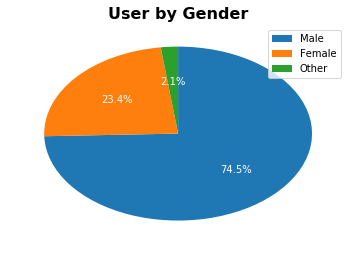

In [33]:
plt.pie(df_gender, labels = df_gender.index, startangle = 90, autopct= '%1.1f%%', counterclock = False, textprops={'color':'white'})
plt.title('User by Gender', fontsize=16, fontweight='bold');
plt.legend();

# From the result above,Most users are male followed by female then the others.

 

# Looking at the weekly Usage

In [34]:
# getting the statistics of the weekdays
df_data_clean.start_day_of_week.describe()

count     173467
unique         7
top          Thu
freq       33422
Name: start_day_of_week, dtype: object

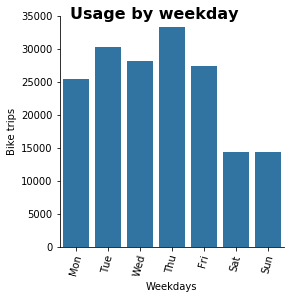

In [35]:
df_weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
plot= sns.factorplot(data=df_data_clean,x='start_day_of_week',kind='count',color=base_color,order=df_weekday)
plot.set_axis_labels('Weekdays','Bike trips')
plot.fig.suptitle('Usage by weekday',fontsize=16,fontweight='bold')
plot.set_xticklabels(rotation=75);

# From our data above we can clearly see that thurday is the day that the bikes are frequently used followed by tuesday. Saturdays and Sundays are when the number drops, therefore, we can make a conclusion that most users use the bikes mainly when commuting to work.





# Looking at Hourly usage

In [36]:
# getting the statistics of hourly usage
df_data_clean.start_time_hour.describe()

count    173467.000000
mean         13.462768
std           4.738521
min           0.000000
25%           9.000000
50%          14.000000
75%          17.000000
max          23.000000
Name: start_time_hour, dtype: float64

In [37]:
def label_basics(title: str, xlabel: str="", ylabel: str="", x_double: bool=False, y_double: bool=False):
    """A function to setup shared setting between graphs

    Args:
        title (str): Graph title
        xlabel (str, optional): Text for x label. Defaults to "".
        ylabel (str, optional): Text for y label. Defaults to "".
        x_double (bool, optional): A boolean value to make the graph double in size in x axis. Defaults to False.
        y_double (bool, optional): A boolean value to make the graph double in size in y axis. Defaults to False.
    """
    
    plt.title(title, fontsize=18, fontweight='bold')
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)

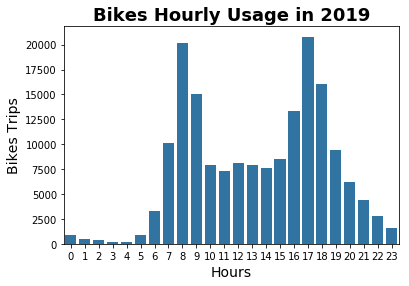

In [38]:
sns.countplot(data=df_data_clean, x='start_time_hour',color=base_color);
label_basics('Bikes Hourly Usage in 2019','Hours','Bikes Trips')

# From our figure above we can tell that the bikes are highly used from 8-9 Am the curve drops but at around 5pm the number of users increased. We can conclude that they are highly used for commuting purposes.

# Looking at the duration by sec

In [39]:
# getting the statistics of duration by sec
df_data_clean.duration_sec.describe()

count    173467.000000
mean        704.089815
std        1646.699459
min          61.000000
25%         323.000000
50%         510.000000
75%         788.000000
max       84548.000000
Name: duration_sec, dtype: float64

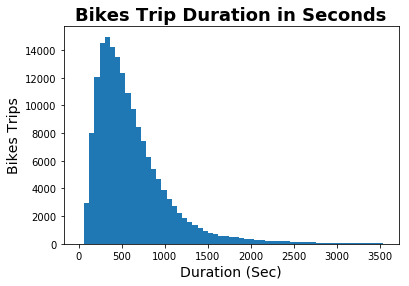

In [40]:
bin_edges = np.arange(0,3600,60)
plt.hist(data=df_data_clean,x='duration_sec',bins=bin_edges)
label_basics('Bikes Trip Duration in Seconds','Duration (Sec)','Bikes Trips')

# Looking at the histogram above, we can see that the rides duration are not more that 2000 sec which is about 33 minutes they mostly last around 8 minutes. This means that the distance covered is less.

# Look at duration by minutes

In [41]:
# getting the statistics of duration by min
df_data_clean.duration_min.describe()

count    173467.000000
mean         11.242905
std          27.446221
min           1.000000
25%           5.000000
50%           8.000000
75%          13.000000
max        1409.000000
Name: duration_min, dtype: float64

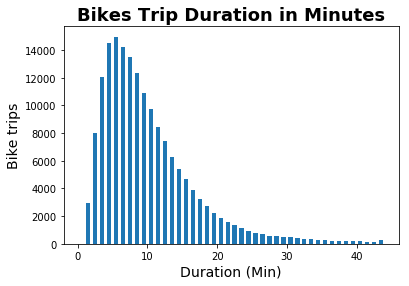

In [42]:
bin_edges = np.arange(0, 45, 1)
ticks = [0, 5, 10, 15, 20, 25, 30,  35, 40, 45]
labels = ['{}'.format(val) for val in ticks]

plt.hist(data = df_data_clean, x = 'duration_min', bins = bin_edges, rwidth = 0.6);
label_basics('Bikes Trip Duration in Minutes','Duration (Min)','Bike trips')

# Look at the Age distribution

In [43]:
# look at the age descriptives
df_data_clean.member_age.describe()

count    173467.000000
mean         33.825333
std           9.376947
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max          64.000000
Name: member_age, dtype: float64

In [44]:
# Look at their means
df_data_clean.member_age.mean()

33.825332772227569

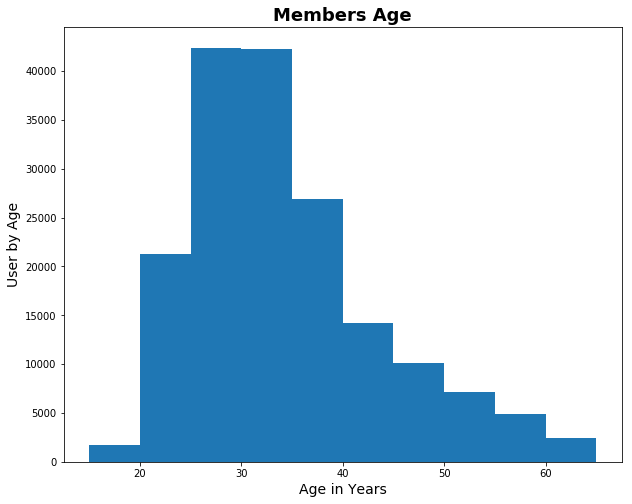

In [45]:
plt.figure(figsize=(10,8))
bin_edges = np.arange(15, 68, 5)

plt.hist(data=df_data_clean, x='member_age',color=base_color, bins=bin_edges);
label_basics('Members Age','Age in Years','User by Age')

# The Average mean is 33 Years Old and from earlier analysis we remove those that were above 64 years old. We can also see that most users age are from 20-40 years olds.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Some cleaning was done and i had to introduce some new columns but some features like age had some outliers. I had to set the minimum age to 15 and maximum to 68 years.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> As mentioned above the members age was set to be below 64 Years old after some cleaning since most range from 20-40 years old

## Bivariate Exploration

> In this section, I investigated the relationship between pairs of variables in the
data. 

# Looking at the user type

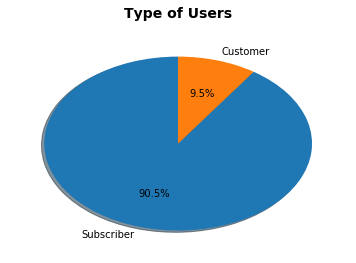

In [46]:
new_data = df_data_clean['user_type'].value_counts()/df_data_clean['user_type'].value_counts().sum()
plt.pie(new_data, labels = new_data.index, autopct='%1.1f%%', shadow = 'True' , startangle = 90)
plt.title('Type of Users', y=1.05, fontsize=14, fontweight='bold');

# Further Visualization

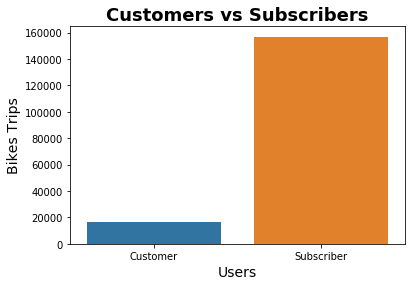

In [47]:
sns.countplot(data=df_data_clean, x='user_type');
label_basics('Customers vs Subscribers','Users','Bikes Trips')

# Most bike users are subscribers represented by 90% while the customers are represented by 9%.

# Now we are going to visualize the different kind of sunscribers against different times, that is, the daily and hourly

# Looking at the Weekly usage Vs Users

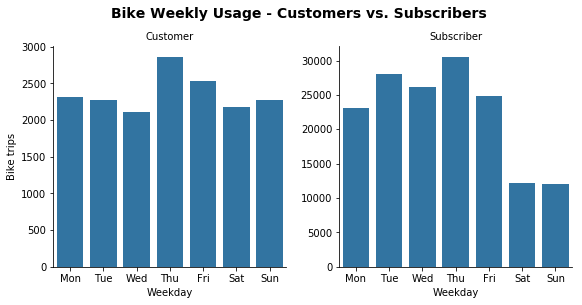

In [48]:
df_weekday = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
plot=sns.factorplot(data=df_data_clean,x='start_day_of_week',col='user_type',color=base_color,order=df_weekday,sharey=False,kind='count')
plot.set_axis_labels('Weekday','Bike trips')
plot.set_titles("{col_name}")
plt.suptitle('Bike Weekly Usage - Customers vs. Subscribers', y=1.05, fontsize=14, fontweight='bold');

# The figure shows that there are different trends on weekly usage between customers and subscribers

> For customers- Thursdays and Fridays has a wide range of users.

> Subscribers- Thursdays and Tuesday has more users but we can see Thursday has more users in both.

# Looking at the Hourly usage Vs the users

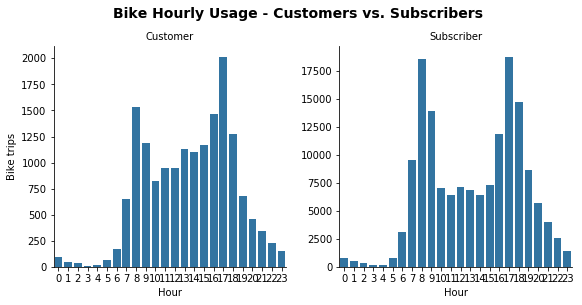

In [49]:
plot= sns.factorplot(data=df_data_clean,x='start_time_hour',col='user_type',color=base_color,sharey=False,kind='count')
plot.set_axis_labels('Hour','Bike trips')
plot.set_titles("{col_name}")
plt.suptitle('Bike Hourly Usage - Customers vs. Subscribers', y=1.05, fontsize=14, fontweight='bold');

# When it comes to hourly usage we can see that they both have similar trends whereby they are highly used in the morning hours that is 8-9 am and 5-6pm.

# Look at the duration in minutes Vs the type of users

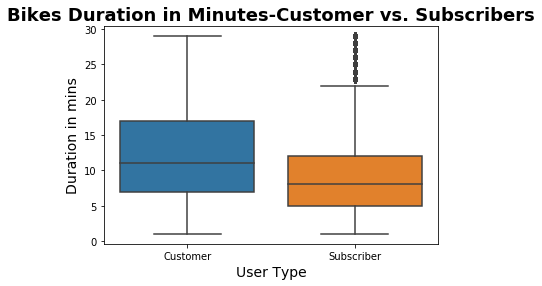

In [50]:
sns.boxplot(data = df_data_clean.query('duration_min < 30'), x = 'user_type', y = 'duration_min')
label_basics('Bikes Duration in Minutes-Customer vs. Subscribers','User Type','Duration in mins')

# The duration in minutes varies depending on the type of users. Subscribers take shorter time in their trips that is between 5 and 13 minutes whille customers who do take longer lasts between 6 to 18 minutes.

# Look at the Members age Vs Type of users

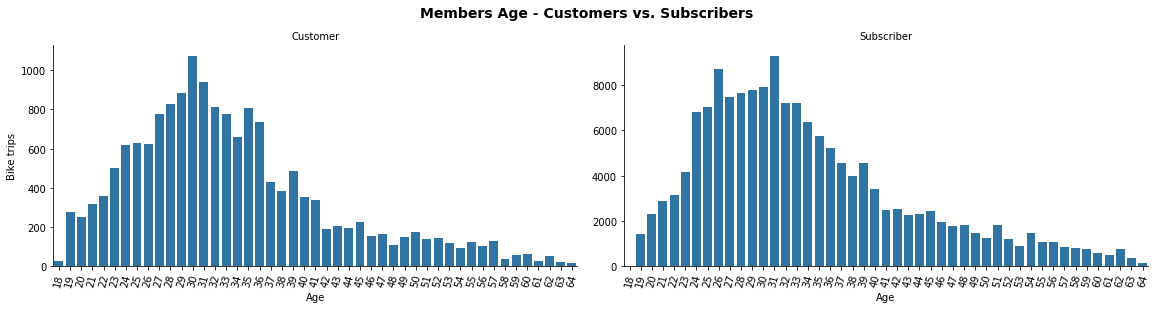

In [51]:
plot= sns.factorplot(data=df_data_clean,x='member_age',col='user_type',color=base_color,sharey=False,kind='count', aspect= 2);
plot.set_axis_labels('Age','Bike trips')
plot.set_titles('{col_name}')
plt.suptitle('Members Age - Customers vs. Subscribers', y=1.05, fontsize=14, fontweight='bold');
plot.set_xticklabels(rotation=75);

# Both do have the same kind of users but we can see that subsribers age threshold do vary a little bit but they both have more users who are of the age of 40 and below.

# Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Introducing the different kind of users, made the analysis more interesting. The result gotten made it clear that subscribers do use the bikes more than the customers during the week for work purposes. Customers are mostly casual users and we can see that they only use the bikes when the week is ending.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> The analysis further shows us that the customers have longer trips than subscribers.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further.

# Looking at weekly usage Vs Gender Vs Users

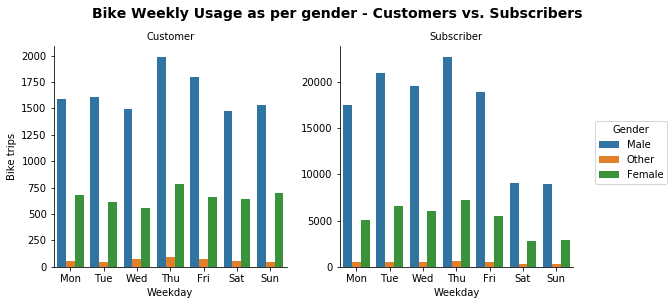

In [52]:
df_weekday = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
plot =sns.factorplot(data=df_data_clean,x='start_day_of_week',col='user_type',hue='member_gender',order=df_weekday,sharey=False,kind='count')
plot.set_axis_labels('Weekday','Bike trips')
plot.set_titles("{col_name}")
plot._legend.set_title('Gender')
plt.suptitle('Bike Weekly Usage as per gender - Customers vs. Subscribers', y=1.05, fontsize=14, fontweight='bold');

# Both type of users have males as the most frequent users. As compared to female users, male are the most subscribers and they frequently use the bikes during the week. As for customers, the most usage happens towards the weekend and used mostly by male.

# Looking at the relationship between gender,age and users.

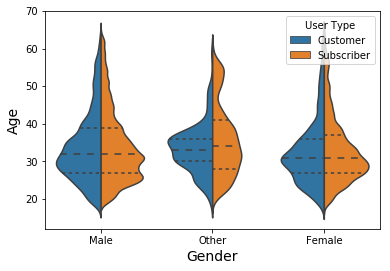

In [53]:
plot = sns.violinplot(data=df_data_clean, x='member_gender', y='member_age', hue="user_type", split=True,  inner="quartile")
plot.set_xlabel("Gender", fontsize=14)
plot.set_ylabel("Age", fontsize=14)
plt.legend(title="User Type");

# The quartiles in both the subscribers and customers are a bit different in female and the other gender but male's quatiles are the same.


# Look at the days of the week Vs Duration in seconds Vs Type of users

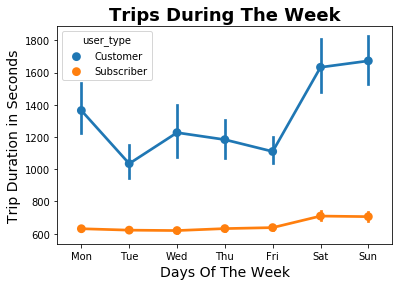

In [54]:
df_weekday = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
Plot=sns.pointplot(data=df_data_clean, x='start_day_of_week' , y='duration_sec', hue='user_type', order=df_weekday)
label_basics('Trips During The Week','Days Of The Week','Trip Duration in Seconds')

# Customers do take longer trips during the weekend as compared to subscribers.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Since Customers mostly look like they are either tourist we can see that they take longer trips more than the subscribers who take shorter trips during weekdays. We can also see that the perfomance of customers is not badly off there are people who still take trips during weekdays.

### Were there any interesting or surprising interactions between features?

> From the results gotten from the visualizations, We can clearly see that male were the frequent users as pointed out before.

## Conclusions
> We can note the sharp difference betweeen the male and female users, both customers and subscribers was high.